In [1]:
%pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install "xarray[io]"

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install --user "xarray[viz]"

Note: you may need to restart the kernel to use updated packages.


*May need to restart kernal*

In [4]:
import xarray as xr
import pandas as pd
import numpy as np

This is from a dataset found in this article (https://www.nature.com/articles/s41597-021-01115-2): "Global gridded crop harvested area, production, yield, and monthly physical area data circa 2015" where they produce gridded data for world crop harvests. Dataset downloadable here: (https://mygeohub.org/publications/60/1)
This dataset only gives the harvested area for a particular crop group. They also use different GAEZ dataset to show gridded yield, but that dataset is GeoTiff file, which seemed annoying to use

In [5]:
data = xr.open_dataset(r'C:\Users\kat\Documents\School\2024-WinterB\LSI\GAEZ2015_Monthly\GAEZ_crop_area_monthly_2015\GZ_Vegetables_3_rfd_area.nc')
data

<xarray.Dataset> Size: 448MB
Dimensions:        (longitude: 4320, latitude: 2160, z: 12)
Coordinates:
  * longitude      (longitude) float64 35kB -180.0 -179.9 -179.8 ... 179.9 180.0
  * latitude       (latitude) float64 17kB 89.96 89.88 89.79 ... -89.88 -89.96
  * z              (z) int32 48B 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    crs            int32 4B ...
    cropland_area  (z, latitude, longitude) float32 448MB ...
Attributes:
    Conventions:  CF-1.4
    created_by:   R, packages ncdf4 and raster (version 3.0-12)
    date:         2021-01-29 10:49:11

In [6]:
data['cropland_area']

<xarray.DataArray 'cropland_area' (z: 12, latitude: 2160, longitude: 4320)> Size: 448MB
[111974400 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float64 35kB -180.0 -179.9 -179.8 ... 179.9 180.0
  * latitude   (latitude) float64 17kB 89.96 89.88 89.79 ... -89.88 -89.96
  * z          (z) int32 48B 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    units:         1000ha
    grid_mapping:  crs
    proj4:         +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0
    min:           [ 0.00000000e+00 -1.86264515e-09  0.00000000e+00  0.000000...
    max:           [0.21260975 0.47834617 0.47834617 0.47834617 0.47834617 0....

This dataset is similar to the goals of the previous one but in NetCDF file format which seems easier to use. Also it covers a large range of years, which might be useful to associate with historical climate changes. From the article (https://www.nature.com/articles/s41597-020-0433-7): "The global dataset of historical yields for major crops 1981–2016". It only covers 4 major crops: wheat, rice, soybean, and maize. Dataset downloadable here: (https://doi.pangaea.de/10.1594/PANGAEA.909132)

In [7]:
# this is just the wheat one specifically for year 1990
gdhy_data = xr.open_dataset(r'C:\Users\kat\Documents\School\2024-WinterB\LSI\GDHY\wheat\yield_1990.nc4')
gdhy_data

<xarray.Dataset> Size: 1MB
Dimensions:  (lon: 720, lat: 360)
Coordinates:
  * lon      (lon) float64 6kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * lat      (lat) float64 3kB -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
Data variables:
    var      (lat, lon) float32 1MB ...

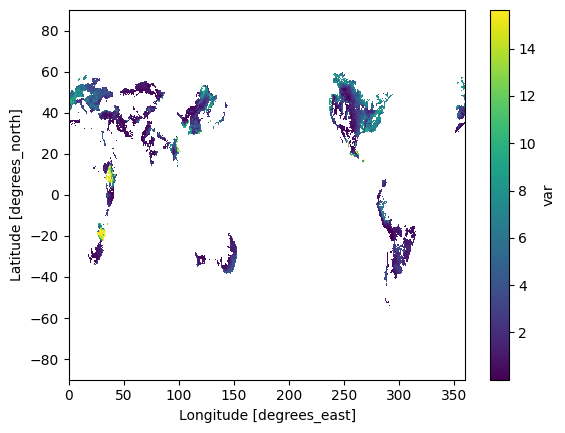

In [8]:
gdhy_data['var'].plot()

Now with a yield dataset, need something to be our climate input. Dealing with a lot of various raw weather data seems challenging, so I looked into 'climate classification' type datasets. This paper (https://www.nature.com/articles/s41597-023-02549-6): "High-resolution (1 km) Köppen-Geiger maps for 1901–2099 based on constrained CMIP6 projections" provides high-resolution gridded data of the climate over historical and projected future timespans. It is also available in NetCDF file format, which should make things more consistent. One challenge might be the discrete groupings, there are 30 climate classes, some of which may be closer together than others? Dataset downloadable here: (https://www.gloh2o.org/koppen/), look carefully for the 'here' link that specifically contains the NetCDF files since they also provide the data in GeoTiff.

Legend linking the numeric values in the maps to the Köppen-Geiger classes.
The RGB colors used in Beck et al. (2023) are provided between brackets.

    1:  Af   Tropical, rainforest                  [0 0 255]
    2:  Am   Tropical, monsoon                     [0 120 255]
    3:  Aw   Tropical, savannah                    [70 170 250]
    4:  BWh  Arid, desert, hot                     [255 0 0]
    5:  BWk  Arid, desert, cold                    [255 150 150]
    6:  BSh  Arid, steppe, hot                     [245 165 0]
    7:  BSk  Arid, steppe, cold                    [255 220 100]
    8:  Csa  Temperate, dry summer, hot summer     [255 255 0]
    9:  Csb  Temperate, dry summer, warm summer    [200 200 0]
    10: Csc  Temperate, dry summer, cold summer    [150 150 0]
    11: Cwa  Temperate, dry winter, hot summer     [150 255 150]
    12: Cwb  Temperate, dry winter, warm summer    [100 200 100]
    13: Cwc  Temperate, dry winter, cold summer    [50 150 50]
    14: Cfa  Temperate, no dry season, hot summer  [200 255 80]
    15: Cfb  Temperate, no dry season, warm summer [100 255 80]
    16: Cfc  Temperate, no dry season, cold summer [50 200 0]
    17: Dsa  Cold, dry summer, hot summer          [255 0 255]
    18: Dsb  Cold, dry summer, warm summer         [200 0 200]
    19: Dsc  Cold, dry summer, cold summer         [150 50 150]
    20: Dsd  Cold, dry summer, very cold winter    [150 100 150]
    21: Dwa  Cold, dry winter, hot summer          [170 175 255]
    22: Dwb  Cold, dry winter, warm summer         [90 120 220]
    23: Dwc  Cold, dry winter, cold summer         [75 80 180]
    24: Dwd  Cold, dry winter, very cold winter    [50 0 135]
    25: Dfa  Cold, no dry season, hot summer       [0 255 255]
    26: Dfb  Cold, no dry season, warm summer      [55 200 255]
    27: Dfc  Cold, no dry season, cold summer      [0 125 125]
    28: Dfd  Cold, no dry season, very cold winter [0 70 95]
    29: ET   Polar, tundra                         [178 178 178]
    30: EF   Polar, frost                          [102 102 102]

In [9]:
kopper_data = xr.open_dataset(r'C:\Users\kat\Documents\School\2024-WinterB\LSI\koppen_geiger\1991_2020\koppen_geiger_1p0.nc')
kopper_data

<xarray.Dataset> Size: 521kB
Dimensions:        (lon: 360, lat: 180)
Coordinates:
  * lon            (lon) float32 1kB -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * lat            (lat) float32 720B 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
Data variables:
    kg_class       (lat, lon) float32 259kB ...
    kg_confidence  (lat, lon) float32 259kB ...
Attributes:
    history:  Created on 2023-08-23 23:13

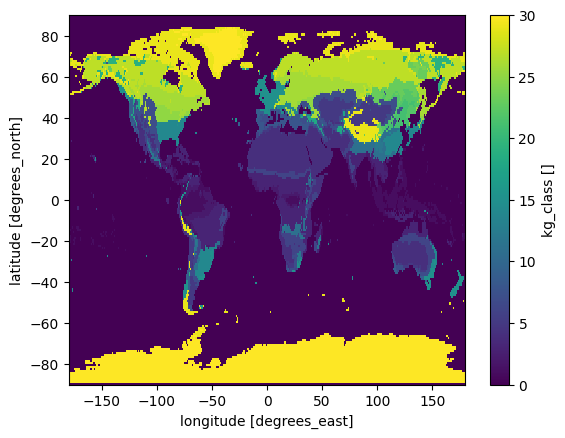

In [11]:
kopper_data['kg_class'].plot()

In [12]:
#TBC